1.3) 국가별 음주 데이터 분석하기

In [1]:


# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../data/drinks.csv' 
drinks = pd.read_csv(file_path) 


<Step1. 탐색> 데이터의 기초 정보 살펴보기

In [2]:
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [3]:
# 상위 10개 데이터 출력
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [4]:
# 수치형 피처의 각 컬럼별 요약 통계(갯수, 평균, 표준편차, 최솟값, 4분위수, 최댓값) 지표 출력
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


<Step2. 인사이트 도출>  탐색과 시각화

[피처간의 상관관계 탐색]

[두 피처간의 상관계수 구하기]
여러 개의 피처들의 서로간의 상관계수를 구하기 앞서, 두 피처간의 상관계수를 구하는 실습
- 상관 분석 : 두 변수 간의 선형적 관계를 상관 계수로 표현하는 것

- 상관 계수 : 두 변수 사이의 통계적 관계를 표현하기 위해 특정한 상관 관계의 정도를 수치적으로 나타낸 계수

- 상관 계수를 구하는 것은 공분산의 개념을 포함 여러 유형의 상관계수가 존재하지만 제각기 자신들만의 정의와 특징이 있음 
- 값의 범위는 -1에서 +1 사이에 속하며 여기서 ±1은 정도가 가장 센 잠재적 일치를 나타내고 0은 정도가 가장 센 불일치를 나타냄 
- 1에 가까울 수록 서로 강한 양의 상관 관계가 있다는 것

- 피어슨 상관 계수(Pearson Correlation Coefficient ,PCC): 두 변수 X 와 Y 간의 선형 상관 관계를 계량화한 수치 스
- 스피어먼 상관 계수(Spearman Correlation Coefficient ,SCC):두 변수의 순위 사이의 통계적 의존성을 측정하는 비모수적인 척도

<피처간의 상관 관계를 통계적으로 탐색하는 방법>
- 단순 상관 분석 방법: 피처가 2 개일 때 상관 계수를 계산하는 방법
- 다중 상관 분석 방법: 피처가 여러 개일 때 상호간의 연관성을 분석하는 방법

[여러 피처의 상관관계 분석]

In [5]:
# 맥주와 와인 소비량의 상관 관계 알아보기
# 'beer_servings', 'wine_servings' 두 피처간의 상관계수를 계산합니다.
# 피어슨 상관 계수(Pearson Correlation Coefficient ,PCC): 두 변수 X 와 Y 간의 선형 상관 관계를 계량화한 수치
# corr() 함수로 피처 간의 상관 계수를 매트릭스(matrix, 행렬, 숫자·기호 등을 가로, 세로로 나열) 형태로 출력할 수 있음
# 단순 상관 분석 방법
# corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
# print(corr)
# 다중 상관 분석 방법
#corr = drinks.corr(method = 'pearson')
corr = drinks[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']].corr(method = 'pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


[seaborn 시각화 라이브러리 활용]

- 히트맵(heatmap), 페어플롯(pairplot) 기법 사용하기

- 히트맵(heatmap) : 히트(heat)와 지도를 뜻하는 맵(map)을 결합시킨 단어로 색상으로 표현할 수 있는 다양한 정보를 일정한 이미지 위에 열분포 형태의 그래픽으로 출력

In [6]:
!pip install seaborn

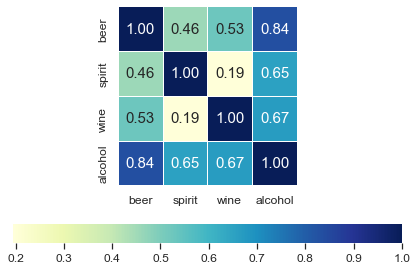

In [7]:
import seaborn as sns

# corr 행렬 히트맵(heatmap)을 시각화합니다.
# 히트맵(heatmap)을 통해 corr.values 를 파라미터로 넣어줌
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.1)
#cbar 히트맵 바 출력 여부, annot 상관 계수 출력 여부, square 사각형의 형태, fmt 소수점 자리수, 
# annot_kws 상관 계수 폰트 크기, yticklabels y 레이블명, xticklabels x 레이블명
hm = sns.heatmap(corr.values,
            cbar=True, 
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view,
            linewidths=.5,
            cmap="YlGnBu",
            cbar_kws={"orientation": "horizontal"})

plt.tight_layout()
plt.show()


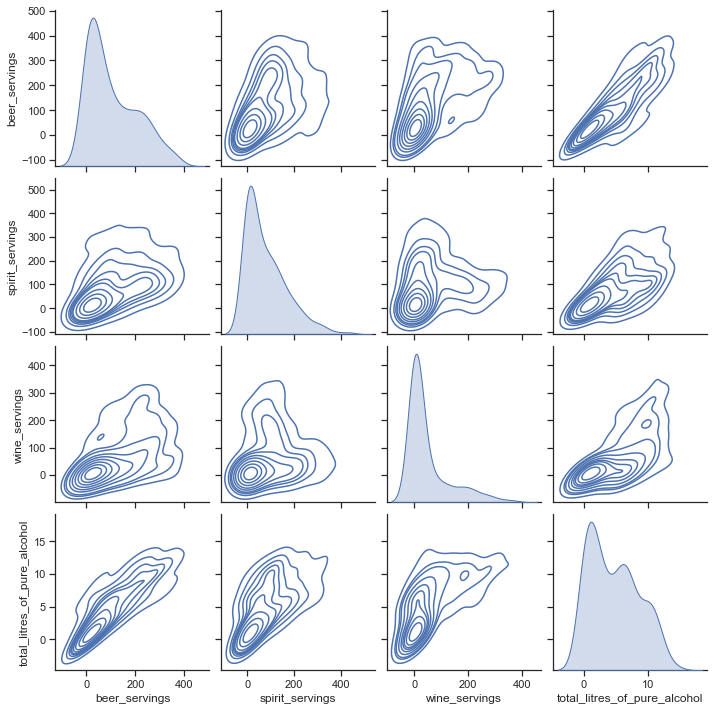

In [8]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
# 페어플롯(pairplot)은 데이터 프레임을 파타미터로 넣어 줌
# style : darkgrid, whitegrid, dark, white, ticks, 이미지의 전반적인 모양을 스타일링, 5가지 스타일 지원
# context : notebook, paper, talk, poster,  어떤 상황에서 보여줄 것인가에 따라 4종류의 텍스트 스케일 지원
sns.set(style='ticks', context='notebook')
# sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
#                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
# kind="hist", kind="kde"
# corner=True, Set corner=True to plot only the lower triangle:
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5, kind="kde")
plt.show()

In [9]:
# 1. 인사이트 도출1 : 대륙별 평균 wine_servings 탐색
drinks.groupby('continent').mean()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [10]:
# 대륙별  wine_servings 평균 1
drinks.groupby('continent').wine_servings.mean()

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

In [11]:
# 대륙별  wine_servings 평균2
drinks.groupby('continent')['wine_servings'].mean()

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

In [12]:
# 대륙별  wine_servings 평균3
drinks.groupby('continent').mean()['wine_servings']

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

In [13]:
# 2. 인사이트 도출2 : 전체 평균보다 적은 알코올을 섭취하는 대륙
total_mean = drinks.total_litres_of_pure_alcohol.mean()
total_mean


4.717098445595855

In [14]:
# 전체 평균보다 적은 알코올을 섭취하는 대륙의 인덱스와 값 추출
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
continent_under_mean = continent_mean[continent_mean <= total_mean]
print(continent_under_mean)

continent
AF    3.007547
AS    2.170455
OC    3.381250
Name: total_litres_of_pure_alcohol, dtype: float64


In [15]:
# 전체 평균보다 적은 알코올을 섭취하는 대륙의 인덱스만 추출
continent_under_mean = continent_mean[continent_mean <= total_mean].index.tolist()
print(continent_under_mean)

['AF', 'AS', 'OC']


In [16]:
# 전체 평균보다 적은 알코올을 섭취하는 대륙의 인덱스만 추출
continent_under_mean = continent_mean[continent_mean <= total_mean].values.tolist()
print(continent_under_mean)

[3.0075471698113208, 2.1704545454545454, 3.38125]


In [17]:
#  대륙별 알코올 섭취 평균1
drinks.groupby('continent').total_litres_of_pure_alcohol.mean()

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [18]:
#  대륙별 알코올 섭취 평균2
drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [19]:
#  대륙별 알코올 섭취 평균3
drinks.groupby('continent').mean()['total_litres_of_pure_alcohol']

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

<Step3. 탐색적 분석>

[결측 데이터 전처리]

In [20]:
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [21]:
# 결측데이터 처리: 기타 대륙으로 통합 -> 'OT' (Others)
# fillna() 함수는 피처의 결측값을 특정 값으로 채워주는 함수
drinks['continent'] = drinks['continent'].fillna('OT')

In [22]:
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [23]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [24]:
 drinks['continent'].value_counts()

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

In [25]:
 drinks['continent'].value_counts().index.tolist()

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

In [26]:
drinks['continent'].value_counts().values.tolist()

[53, 45, 44, 23, 16, 12]

전체 대륙 중에서 OT 가 차지하는 비율을 파이차트로 확인

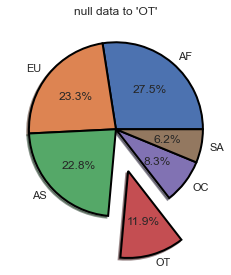

In [27]:
# 그래프를 표시하기 위한 인덱스와 값을 추출해서 리스트로 생성
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0, 0, 0, 0.5, 0, 0)

plt.pie(fracs1, labels=labels, autopct='%.1f%%', shadow=True, explode=explode, radius=1,wedgeprops={"linewidth": 2, "edgecolor": "black"})
plt.title('null data to \'OT\'')
plt.show()

[그룹 단위의 데이터 분석 : 대륙별 분석]

apply, agg 함수를 이용한 대륙별 분석

1. 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산

In [28]:
drinks.groupby('continent').spirit_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.339623,28.102794,0.0,1.00,3.0,19.00,152.0
AS,44.0,60.840909,84.362160,0.0,1.00,16.0,98.00,326.0
EU,45.0,132.555556,77.589115,0.0,81.00,122.0,173.00,373.0
OC,16.0,58.437500,70.504817,0.0,18.00,37.0,65.25,254.0
OT,23.0,165.739130,94.993884,68.0,101.00,137.0,190.50,438.0
SA,12.0,114.750000,77.077440,25.0,65.75,108.5,148.75,302.0


- agg() 함수는 apply() 함수와 거의 동일하게 함수 파라미터를 받음
- agg() 함수는 함수 파라미터를 병렬로 설정하여 그룹에 대한 여러가지 연산 결과를 동시에 얻을 수 있는 함수
- agg() 함수를 이용해 'mean', 'min', 'max', 'sum' 함수 파라미터를 간단히 탐색

In [29]:
drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


2. 전체 평균보다 많은 알코올을 섭취하는 대륙

2-1: 전체 알코올 섭취 평균
2-2: 대륙별 알코올 섭취 평균
2-3: 대륙별 알코올 섭취 평균이 전체 알코올 섭취 평균보다 낮은 대륙을 구하기

In [30]:
# 2-1: 전체 알코올 섭취 평균
total_mean = drinks.total_litres_of_pure_alcohol.mean()
# 2-2: 대륙별 알코올 섭취 평균
#drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()
# 데이터프레임[조건]
continent_mean[continent_mean < total_mean]

continent
AF    3.007547
AS    2.170455
OC    3.381250
Name: total_litres_of_pure_alcohol, dtype: float64

3. 평균 beer_servings이 가장 높은 대륙
- idxmin, idxmax 는 전체 인덱스 중 최소값, 최대값을 반환
- 3-1: 대륙별 평균 beer_servings 계산
- 3-2: 결과 중 값이 가장 높은 인덱스만 추출

In [31]:
# 평균 beer_servings이 가장 높은 대륙의 인덱스와 값
drinks.groupby('continent').beer_servings.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
OT    145.434783
SA    175.083333
Name: beer_servings, dtype: float64

In [32]:
# 평균 beer_servings이 가장 높은 대륙의 인덱스
drinks.groupby('continent').beer_servings.mean().idxmax()

'EU'

In [33]:
# 평균 beer_servings이 가장 높은 대륙의 값
drinks.groupby('continent').beer_servings.mean().max()

193.77777777777777

In [34]:
# 평균 beer_servings이 가장 낮은 대륙의 인덱스
drinks.groupby('continent').beer_servings.mean().idxmin()

'AS'

In [35]:
# 평균 beer_servings이 가장 낮은 대륙의 값
drinks.groupby('continent').beer_servings.mean().min()

37.04545454545455

3. 대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화합니다.

In [36]:
result = drinks.groupby('continent').spirit_servings.agg(['mean', 'min', 'max', 'sum'])
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


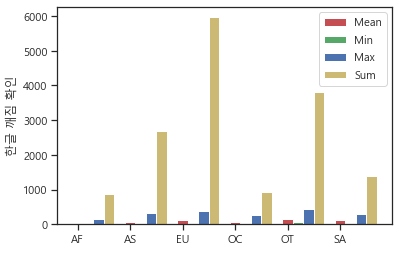

In [37]:
#플랫폼을 이용한 방법

# import platform
# platform.system()
# #운영체재 확인

# if platform.system() == 'Darwin': #Mac os 환경 폰트설정
#     plt.rc('font', family='AppleGothic')
    
# elif platform.system() == 'Windows': #윈도우 환경 폰트 설정
#     plt.rc('font', family='Malgun Gothic')

# plt.rc('axes', unicode_minus=False)# 마이너스 폰트 설정이래요

# %config InlineBackend.figure_format = 'retina'

######################################################################

## os를 이용한 방법 
# import os
# os.name

# if os.name == 'posix': # mac os 환경
#     plt.rc('font', family='AppleGothic')
# elif os.name == 'nt': # 윈도우 환경
#     plt.rc('font', family='Malgun Gothic')

# plt.rc('axes', unicode_minus=False)# 마이너스 폰트 설정이래요   

# %config InlineBackend.figure_format = 'retina'


plt.rc('font', family='Malgun Gothic')
# 그냥 이렇게 해도되네 썋...


n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist() 
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups) # n_groups의 크기 6만큼 배열 생성하여 index에 저장
bar_width = 0.2

# 평균 값에 대한 그래프 생성
rects1 = plt.bar(index, means, bar_width, color='r',label='Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color='g',label='Min')
rects3 = plt.bar(index + bar_width * 2, maxs, bar_width, color='b',label='Max')
rects4 = plt.bar(index + bar_width * 3, sums, bar_width, color='y',label='Sum')

plt.xticks(index, result.index.tolist())
plt.ylabel('한글 깨짐 확인')
plt.legend() # 그래프에 범례를 달고 싶을 때 쓰는 함수
plt.show()

In [38]:
drinks.to_csv('save1.csv') #csv 저장하는 법 

4.대륙별 total_liters_of_pure_alcohol을 시각화

In [39]:
#대륙별 total_liters_of_alchol을 시각화 
continent_mean = drinks.groupby('continent').total_litres_of_pure_alcohol.mean()

In [40]:
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [41]:
continent_mean.index

Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA'], dtype='object', name='continent')

In [42]:
continent_mean.values

array([3.00754717, 2.17045455, 8.61777778, 3.38125   , 5.99565217,
       6.30833333])

In [43]:
#대륙별 평균의 인덱스만 추출해서 continents 리스트 생성
continents = continent_mean.index.tolist()
continents.append('mean')
continents

['AF', 'AS', 'EU', 'OC', 'OT', 'SA', 'mean']

In [44]:
#대륙별 평균의 값만 추출해서 alcohol 리스트 생성
total_mean = drinks.total_litres_of_pure_alcohol.mean()
total_mean

4.717098445595855

In [45]:
alcohol = continent_mean.tolist()
alcohol.append(total_mean) #대륙별 알코올 평균 리스트 마지막에 전체 평균을 추가 
alcohol

[3.0075471698113208,
 2.1704545454545454,
 8.617777777777778,
 3.38125,
 5.995652173913044,
 6.308333333333334,
 4.717098445595855]

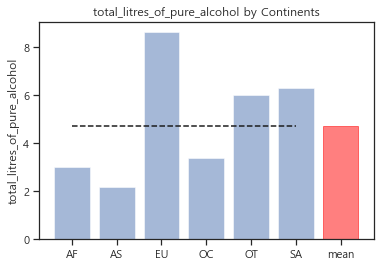

In [46]:
# 막대그래프 출력
x_pos = np.arange(len(continents)) #continents길이만큼 x_pos를 만들어줘야함
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5) 
bar_list[len(continents)-1].set_color('red') 
#mean에 색을 추가하기위해 변수지정하고 추가해줌 

plt.plot([0, 5], [total_mean, total_mean],'k--') #평균 수치 선을 생성해줌
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continents')

plt.show()

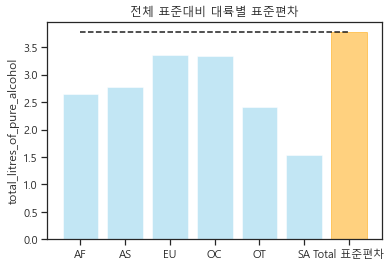

In [47]:
#전체 표준편차 대비 대륙별 표준편차 구하기 
total_std = drinks.total_litres_of_pure_alcohol.std()
continents_std=drinks.groupby('continent')['total_litres_of_pure_alcohol'].std()

continents = continents_std.index.tolist()
continents.append('Total 표준편차')
continents

#alcohol = continent_std.tolist()
alcohol = continents_std.values.tolist()
alcohol.append(total_std)

x_pos = np.arange(len(continents))
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5, color='skyblue') 
bar_list[len(continents)-1].set_color('orange')

plt.plot([0, 6], [total_std, total_std],'k--')
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('전체 표준대비 대륙별 표준편차')

plt.show()

In [48]:
!pip install scipy

<step4. 통계적 분석> : 분석 대상간의 통계적 차이 거정하기

[아프리카와 유럽간의 맥주 소비량 차이 검정하기]

In [49]:
#loc()는 인데스를 기준으로 행 데이터 추출

# continent 피처의 값이 AF인 것의 행 데이터 추출
africa = drinks.loc[drinks['continent']=='AF']

# continent 피처의 값이 AF인 것의 행 데이터 추출
europe = drinks.loc[drinks['continent']=='EU']

In [50]:
africa

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
2,Algeria,25,0,14,0.7,AF
4,Angola,217,57,45,5.9,AF
18,Benin,34,4,13,1.1,AF
22,Botswana,173,35,35,5.4,AF
26,Burkina Faso,25,7,7,4.3,AF
27,Burundi,88,0,0,6.3,AF
28,Cote d'Ivoire,37,1,7,4.0,AF
29,Cabo Verde,144,56,16,4.0,AF
31,Cameroon,147,1,4,5.8,AF
33,Central African Republic,17,2,1,1.8,AF


In [51]:
europe

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU
15,Belarus,142,373,42,14.4,EU
16,Belgium,295,84,212,10.5,EU
21,Bosnia-Herzegovina,76,173,8,4.6,EU
25,Bulgaria,231,252,94,10.3,EU
42,Croatia,230,87,254,10.2,EU


In [53]:
from scipy import stats

In [60]:
#등분산을 가정한 케이스
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])

#등분산을 가정하지 않은 케이스 
tTestResultDiffiVar=stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)

In [62]:
print("the t-statistic and p-value assuming equal variances is %.3f and %.3f"%(tTestResult))
print("the t-statistic and p-value assuming equal variances is %.3f and %.3f"%(tTestResultDiffiVar))

the t-statistic and p-value assuming equal variances is -7.268 and 0.000
the t-statistic and p-value assuming equal variances is -7.144 and 0.000


대한민국은 얼마나 술을 독하게 마시는 나라일까?

In [63]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [65]:
#전체 술 소비량 피처 생성
drinks['total_servings']=drinks['beer_servings']+drinks['wine_servings']+drinks['spirit_servings']

In [66]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


In [67]:
#전체 술 소비량 대비 알콜 비율 피처를 생성
drinks['alcohol_rate']=drinks['total_litres_of_pure_alcohol']/drinks['total_servings']

In [68]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,NaN
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,0.017661
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


In [69]:
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

In [70]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,0.017661
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


In [75]:
#순위 정보를 생성
country_with_rank = drinks[['country','alcohol_rate']].sort_values(by=['alcohol_rate'],ascending=0)
country_with_rank

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
...,...,...
103,Maldives,0.000000
97,Libya,0.000000
79,Iran,0.000000
90,Kuwait,0.000000


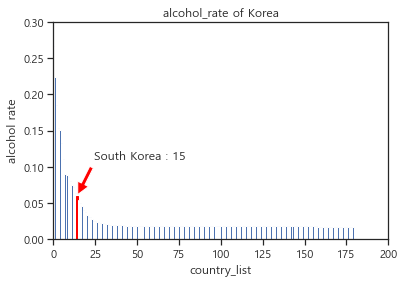

In [91]:
#국가별 순위정보를 그래프로 시각화 해보자

#순위정보 중 cpuntry 피처로 리스트생성
country_list=country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))

#순위정보 중 alcohol_rate 피처로 리스트생성
rank=country_with_rank.alcohol_rate.tolist()

bar_list=plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('red')
plt.ylabel('alcohol rate')
plt.xlabel('country_list')
plt.title('alcohol_rate of Korea')
plt.axis([0, 200, 0, 0.3]) # x,y 축에 대한 옵션을 다루는 메소드, x축0-200, y축 0-3까자 값 출력

korea_alc_rate = country_with_rank[country_with_rank['country']=='South Korea']['alcohol_rate'].values[0]
korea_rank = country_list.index("South Korea")
plt.annotate('South Korea : '+ str(korea_rank + 1),  # 텍스트값
            xy=(korea_rank, korea_alc_rate),     # 화살표 머리 표시할 x,y위치
            xytext=(korea_rank +10, korea_alc_rate + 0.05), # 화살표 텍스트를 표시할 x,y위치
            arrowprops=dict(facecolor='red', shrink=0.05)) # 화살표 색상

       
plt.show()